### Davis / KIBA data analysis

In [34]:
# hello world

In [35]:
!pip install pyTDC

In [36]:
!pip install networkX

In [37]:
import pandas as pd
import numpy as np
from rdkit import Chem
from tdc.multi_pred import DTI
import matplotlib.pyplot as plt
import networkx as nx
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
from scipy.stats import pearsonr

In [38]:
from tdc.multi_pred import DTI
davis = DTI(name = 'DAVIS')
# davis.convert_to_log(form = 'binding')
split = davis.get_split()
# 왜 log form으로 바꾸는지 공부
#form = binding은 뭐지?


split['train']

Found local copy...
Loading...
Done!


,Drug_ID,Drug,Target_ID,Target,Y
0,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,AAK1,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,43.0
1,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,ABL1p,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,10000.0
2,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,ABL2,MVLGTVLLPPNSYGRDQDTSLCCLCTEASESALPDLTDHFASCVED...,10000.0
3,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,ACVR1,MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVCEGLSCGNED...,10000.0
4,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,ACVR2A,MGAAAKLAFAVFLISCSSGAILGRSETQECLFFNANWEKDRTNQTG...,10000.0
...,...,...,...,...,...
18036,151194,Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1,YES,MGCIKSKENKSPAIKYRPENTPEPVSTSVSHYGAEPTTVSPCPSSS...,10000.0
18037,151194,Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1,YSK1,MAHLRGFANQHSRVDPEELFTKLDRIGKGSFGEVYKGIDNHTKEVV...,10000.0
18038,151194,Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1,YSK4,MSSMPKPERHAESLLDICHDTNSSPTDLMTVTKNQNIILQSISRSE...,1900.0
18039,151194,Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1,ZAK,MSSLGASFVQIKFDDLQFFENCGGGSFGSVYRAKWISQDKEVAVKK...,4400.0


In [39]:
kiba = DTI(name = 'KIBA')
split = kiba.get_split()

split['train']

Found local copy...
Loading...
Done!


,Drug_ID,Drug,Target_ID,Target,Y
0,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O14920,MSWSPSLTTQTCGAWEMKERLGTGGFGNVIRWHNQETGEQIAIKQC...,11.10000
1,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P04626,MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDML...,11.10000
2,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P06239,MGCGCSSHPEDDWMENIDVCENCHYPIVPLDGKGTLLIRNGSEVRD...,11.10000
3,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P15056,MAALSGGGGGGAEPGQALFNGDMEPEAGAGAGAAASSAADPAIPEE...,11.10000
4,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P24941,MENFQKVEKIGEGTYGVVYKARNKLTGEVVALKKIRLDTETEGVPS...,11.10000
...,...,...,...,...,...
82355,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13554,MATTVTCTRFTDEYQLYEDIGKGAFSVVRRCVKLCTGHEYAAKIIN...,10.49794
82356,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13555,MATTATCTRFTDDYQLFEELGKGAFSVVRRCVKKTSTQEYAAKIIN...,10.49794
82357,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13557,MASTTTCTRFTDEYQLFEELGKGAFSVVRRCMKIPTGQEYAAKIIN...,10.49794
82358,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q16539,MSQERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKT...,10.49794


In [40]:
kiba = pd.DataFrame(kiba.get_data())
davis = pd.DataFrame(davis.get_data())

In [41]:
davis

,Drug_ID,Drug,Target_ID,Target,Y
0,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,AAK1,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,43.0
1,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,ABL1p,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,10000.0
2,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,ABL2,MVLGTVLLPPNSYGRDQDTSLCCLCTEASESALPDLTDHFASCVED...,10000.0
3,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,ACVR1,MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVCEGLSCGNED...,10000.0
4,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,ACVR1B,MAESAGASSFFPLVVLLLAGSGGSGPRGVQALLCACTSCLQANYTC...,10000.0
...,...,...,...,...,...
25767,151194,Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1,YES,MGCIKSKENKSPAIKYRPENTPEPVSTSVSHYGAEPTTVSPCPSSS...,10000.0
25768,151194,Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1,YSK1,MAHLRGFANQHSRVDPEELFTKLDRIGKGSFGEVYKGIDNHTKEVV...,10000.0
25769,151194,Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1,YSK4,MSSMPKPERHAESLLDICHDTNSSPTDLMTVTKNQNIILQSISRSE...,1900.0
25770,151194,Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1,ZAK,MSSLGASFVQIKFDDLQFFENCGGGSFGSVYRAKWISQDKEVAVKK...,4400.0


In [42]:
kiba

,Drug_ID,Drug,Target_ID,Target,Y
0,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O00141,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,11.10000
1,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O14920,MSWSPSLTTQTCGAWEMKERLGTGGFGNVIRWHNQETGEQIAIKQC...,11.10000
2,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O15111,MERPPGLRPGAGGPWEMRERLGTGGFGNVCLYQHRELDLKIAIKSC...,11.10000
3,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P00533,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,11.10000
4,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P04626,MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDML...,11.10000
...,...,...,...,...,...
117652,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13554,MATTVTCTRFTDEYQLYEDIGKGAFSVVRRCVKLCTGHEYAAKIIN...,10.49794
117653,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13555,MATTATCTRFTDDYQLFEELGKGAFSVVRRCVKKTSTQEYAAKIIN...,10.49794
117654,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13557,MASTTTCTRFTDEYQLFEELGKGAFSVVRRCMKIPTGQEYAAKIIN...,10.49794
117655,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q16539,MSQERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKT...,10.49794


In [43]:
# Y 값이 작을수록 잘 binding하는 것

# na 개수
kiba_na_count = kiba['Drug'].isna().sum()
davis_na_count = davis['Drug'].isna().sum()

print(f"KIBA Drug 열 NaN 개수: {kiba_na_count}")
print(f"Davis Drug 열 NaN 개수: {davis_na_count}")

KIBA Drug 열 NaN 개수: 0
Davis Drug 열 NaN 개수: 0


In [44]:
# 겹치는 Drug 개수
overlap_drugs = set(kiba['Drug']).intersection(set(davis['Drug']))

# 겹치는 Target 개수
overlap_targets = set(kiba['Target']).intersection(set(davis['Target']))

# Drug-Target 쌍이 완전히 같은 경우
kiba_pairs = set(zip(kiba['Drug'], kiba['Target']))
davis_pairs = set(zip(davis['Drug'], davis['Target']))
overlap_pairs = kiba_pairs.intersection(davis_pairs)

print(f"겹치는 Drug 개수: {len(overlap_drugs)}")
print(f"겹치는 Target 개수: {len(overlap_targets)}")
print(f"Drug와 Target이 모두 겹치는 Pair 개수: {len(overlap_pairs)}")

겹치는 Drug 개수: 9
겹치는 Target 개수: 179
Drug와 Target이 모두 겹치는 Pair 개수: 1043


In [45]:
print(f"Kiba unique Drugs: {kiba['Drug'].nunique()}, unique targets: {kiba['Target'].nunique()}")
print(f"Davis unique Drugs: {davis['Drug'].nunique()}, unique targets: {davis['Target'].nunique()}")

Kiba unique Drugs: 2068, unique targets: 229
Davis unique Drugs: 68, unique targets: 379


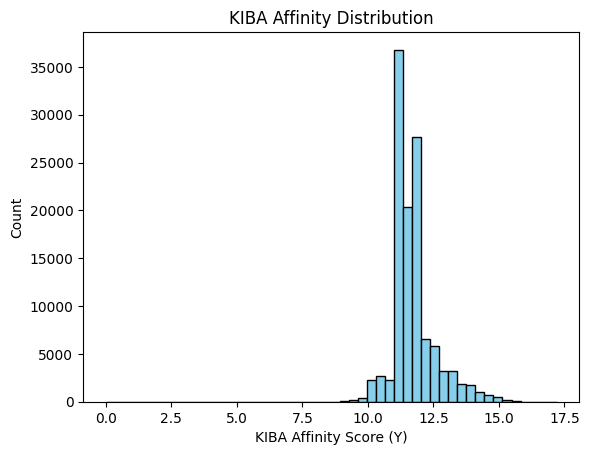

In [46]:
# 1. KIBA Affinity 값 히스토그램
plt.hist(kiba['Y'], bins=50, alpha=1, color='skyblue', edgecolor='black') # bins: 구간 개수 / alpha: 투명도
plt.xlabel("KIBA Affinity Score (Y)")
plt.ylabel("Count")
plt.title("KIBA Affinity Distribution")
plt.show()

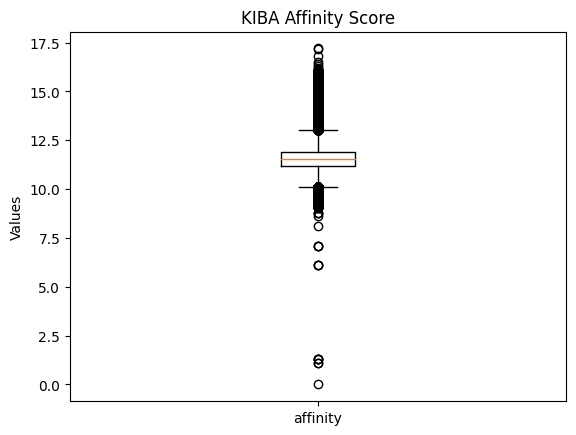

In [47]:
# 박스플롯 그리기
plt.boxplot(kiba['Y'], labels=['affinity'])  # labels 옵션으로 각 그룹에 대한 라벨 지정
plt.title('KIBA Affinity Score')
# plt.xlabel('Groups')
plt.ylabel('Values')
plt.show()

In [48]:
# 2. KIBA 기본 통계
kiba_stats = kiba['Y'].describe().to_frame().T
kiba_stats

,count,mean,std,min,25%,50%,75%,max
Y,117657.0,11.720685,0.834272,0.0,11.2,11.520216,11.923909,17.200179


In [49]:
# 3. Drug/Target 개수
drug_target_stats = pd.DataFrame({
    'unique_drugs': [kiba['Drug'].nunique()],
    'unique_targets': [kiba['Target'].nunique()],
    'total_pairs': [len(kiba)]
})
drug_target_stats

,unique_drugs,unique_targets,total_pairs
0,2068,229,117657


In [50]:
# Drug, Target 컬럼 기준으로 중복 여부 확인
duplicates = kiba[kiba.duplicated(subset=['Drug', 'Target'], keep=False)]

# 중복 쌍 개수
num_duplicates = duplicates.shape[0]

# 고유한 중복 쌍 목록
duplicate_pairs = duplicates[['Drug', 'Target']].drop_duplicates()

print(f"중복 행 개수: {num_duplicates}")
print(f"중복 쌍 개수: {duplicate_pairs.shape[0]}")
print(duplicate_pairs.head())


중복 행 개수: 0
중복 쌍 개수: 0
Empty DataFrame
Columns: [Drug, Target]
Index: []


In [51]:
# 4. Drug-Target 네트워크 분석
G_kiba = nx.Graph()
for _, row in kiba.iterrows(): # 데이터셋을 한 행씩 순회
    G_kiba.add_node(row['Drug'], bipartite=0)
    G_kiba.add_node(row['Target'], bipartite=1)
    G_kiba.add_edge(row['Drug'], row['Target'], weight=row['Y']) # 약물-타겟 쌍 가운에 edge 추가(친확도) -> 중복 허용 x

degree_drugs_kiba = [G_kiba.degree(n) for n in kiba['Drug'].unique()] # unique한 drug들에 대해 degree를 구함
degree_targets_kiba = [G_kiba.degree(n) for n in kiba['Target'].unique()]

network_stats_kiba = pd.DataFrame([{
    "num_nodes": G_kiba.number_of_nodes(),
    "num_edges": G_kiba.number_of_edges(),
    "avg_degree_drugs": np.mean(degree_drugs_kiba),
    "avg_degree_targets": np.mean(degree_targets_kiba)
}])

In [52]:
network_stats_kiba

,num_nodes,num_edges,avg_degree_drugs,avg_degree_targets
0,2297,117657,56.894101,513.786026


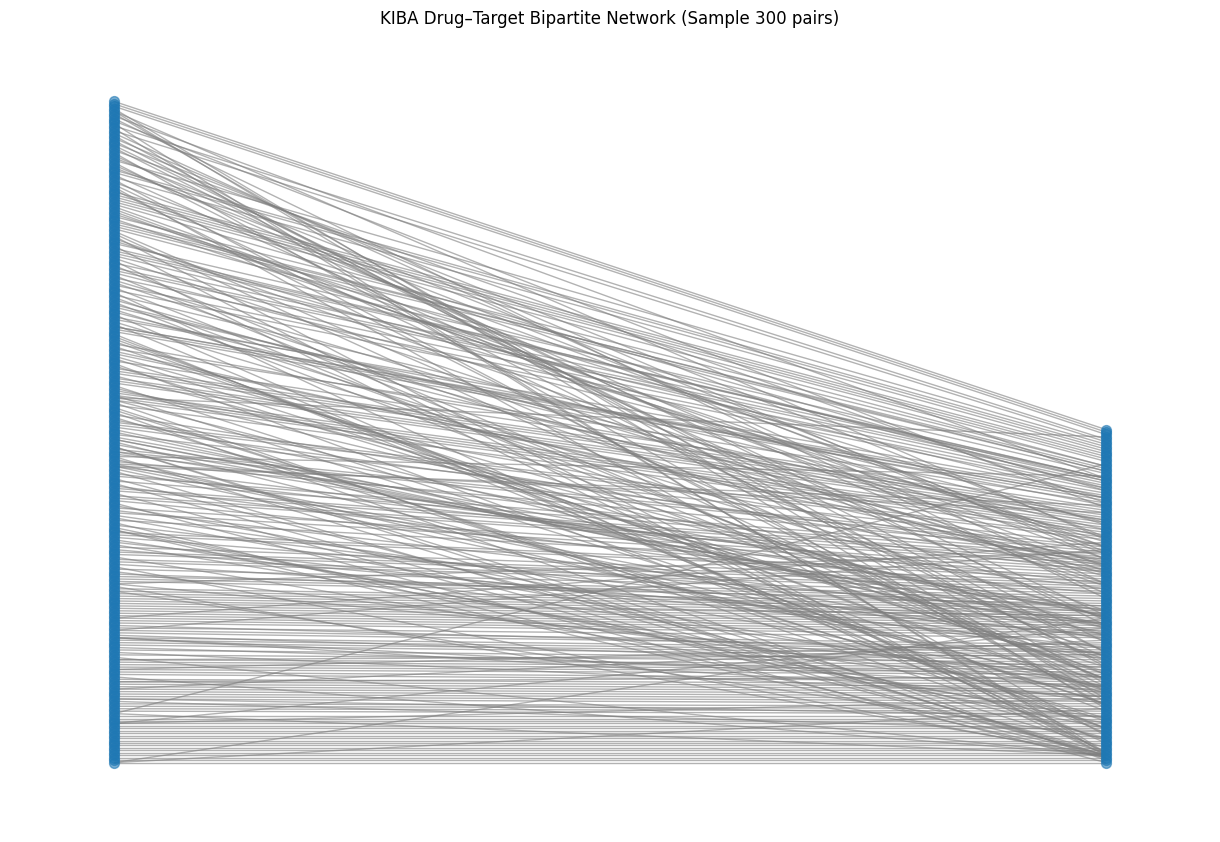

In [53]:
# 샘플링 (시각화 부담 줄이기 위해)
sample_kiba = kiba.sample(300, random_state=42)

# 이분 그래프 생성
B = nx.Graph()
B.add_nodes_from(sample_kiba['Drug'], bipartite=0)  # Drug 노드
B.add_nodes_from(sample_kiba['Target'], bipartite=1)  # Target 노드

# 엣지 추가
edges = list(zip(sample_kiba['Drug'], sample_kiba['Target'])) # Drug - Target을 엣지로
B.add_edges_from(edges)

# bipartite layout 사용
drug_nodes = list(sample_kiba['Drug'].unique())
target_nodes = list(sample_kiba['Target'].unique())
pos = dict()
pos.update((n, (0, i)) for i, n in enumerate(drug_nodes))   # x=0 for drugs
pos.update((n, (1, i)) for i, n in enumerate(target_nodes)) # x=1 for targets

# 시각화
plt.figure(figsize=(12, 8))
nx.draw(B, pos, with_labels=False, node_size=50, edge_color='gray', alpha=0.6)
plt.title("KIBA Drug–Target Bipartite Network (Sample 300 pairs)")
plt.show()

In [54]:
# Drug 차수 분포 데이터프레임
drug_degree_df = pd.DataFrame({
    'Drug_ID': list(kiba['Drug'].unique()),
    'Degree': degree_drugs_kiba
}).sort_values(by='Degree', ascending=False)

# Target 차수 분포 데이터프레임
target_degree_df = pd.DataFrame({
    'Target_ID': list(kiba['Target'].unique()),
    'Degree': degree_targets_kiba
}).sort_values(by='Degree', ascending=False)

In [55]:
# print(f"약물별 매칭된 타겟수: {drug_degree_df}")
# print(f"타겟별 매칭된 약물수: {target_degree_df}")
drug_degree_df

,Drug_ID,Degree
399,CCN(CC)CCNC(=O)c1c(C)[nH]c(C=C2C(=O)Nc3ccc(F)c...,166
644,CN1CCN(c2nc(C3=C(c4c[nH]c5ccccc45)C(=O)NC3=O)c...,166
587,O=C1NCCc2[nH]c(-c3ccncc3)cc21,165
396,Cn1c(NCC(N)Cc2ccccc2)nc(-c2ccncc2)c(-c2ccc3ccc...,164
594,NC(=O)c1c(OCc2c(F)cc(Br)cc2F)nsc1NC(=O)NCCCCN1...,161
...,...,...
1799,O=C1OC2C(O)OC3CC(=O)c4cc(O)c(O)c(O)c4-c4c(O)c(...,11
1798,O=C(OC1C(O)CC(O)(C(=O)O)CC1O)c1cc(O)c(O)c(O)c1,11
1797,O=C(OC1C(O)CC(OC(=O)c2cc(O)c(O)c(O)c2)(C(=O)O)...,11
1796,O=C(OC1Cc2c(O)cc(O)c(C3c4c(O)cc(O)cc4OC(c4ccc(...,11


In [56]:
target_degree_df

,Target_ID,Degree
56,MQSKVLLAVALWLCVETRAASVGLPSVSLDLPRLSIQKDILTIKAN...,1432
48,MGNAAAAKKGSEQESVKEFLAKAKEDFLKKWESPAQNTAHLDQFER...,1237
28,MSANNSPPSAQKSVLPTAIPAVLPAASPCSSPKTGLSARLSNGSFS...,1203
12,MSGRPRTTSFAESCKPVQQPSAFGSMKVSRDKDGSKVTTVVATPGQ...,1168
5,MGCGCSSHPEDDWMENIDVCENCHYPIVPLDGKGTLLIRNGSEVRD...,1135
...,...,...
140,MALRRLGAALLLLPLLAAVEETLMDSTTATAELGWMVHPPSGWEEV...,13
146,MSQSKGKKRNPGLKIPKEAFEQPQTSSTPPRDLDSKACISIGNQNF...,13
145,MDTKSILEELLLKRSQQKKKMSPNNYKERLFVLTKTNLSYYEYDKM...,13
163,MGCVFCKKLEPVATAKEDAGLEGDFRSYGAADHYGPDPTKARPASS...,12


### 커뮤니티 분석

In [57]:
# drug_deg_map = {n: G_kiba.degree(n) for n in kiba['Drug'].unique()}
# target_deg_map = {n: G_kiba.degree(n) for n in kiba['Target'].unique()}

# # 상위 100개 Drug, Target 추출
# top_drugs = sorted(drug_deg_map, key=drug_deg_map.get, reverse=True)[:50]
# top_targets = sorted(target_deg_map, key=target_deg_map.get, reverse=True)[:50]

# # 서브그래프 생성 (상위 drug과 target만)
# sub_nodes = set(top_drugs) | set(top_targets)
# subgraph = G_kiba.subgraph(sub_nodes)

# # Community Detection
# communities = list(nx.algorithms.community.greedy_modularity_communities(subgraph))

# # 커뮤니티 매핑
# node_to_community = {}
# for i, comm in enumerate(communities):
#     for node in comm:
#         node_to_community[node] = i

# # 커뮤니티 크기 표
# community_size_df = pd.DataFrame(
#     {"Community": list(set(node_to_community.values()))}
# )
# community_size_df["Size"] = community_size_df["Community"].map(
#     lambda c: sum(1 for v in node_to_community.values() if v == c)
# ).sort_values(ascending=False)

# # 시각화
# plt.figure(figsize=(10, 8))
# pos = nx.spring_layout(subgraph, seed=42)
# colors = [node_to_community[n] for n in subgraph.nodes()]
# nx.draw(subgraph, pos, node_color=colors, with_labels=False, node_size=50, cmap=plt.cm.tab10)
# plt.title("Top 100 Drugs & Targets Community Detection (KIBA)")
# plt.show()


In [58]:
# community_size_df

In [59]:
# # --- 0) 친화도 컬럼 지정 ---
# affinity_col = "Y"

# # --- 1) 서브그래프 엣지에 친화도 할당 ---
# from collections import defaultdict

# edge_vals = defaultdict(list)
# sub_nodes_set = set(subgraph.nodes())

# for _, row in kiba.iterrows():
#     d, t = row["Drug"], row["Target"]
#     if d in sub_nodes_set and t in sub_nodes_set:
#         if subgraph.has_edge(d, t) or subgraph.has_edge(t, d):
#             edge_vals[tuple(sorted((d, t)))].append(row[affinity_col])

# # 평균 친화도 계산
# edge_affinity_mean = {e: sum(v) / len(v) for e, v in edge_vals.items()}

# # NetworkX 엣지 속성으로 저장
# for (u, v) in subgraph.edges():
#     key = tuple(sorted((u, v)))
#     if key in edge_affinity_mean:
#         subgraph[u][v]["affinity"] = edge_affinity_mean[key]

# # --- 2) 커뮤니티별 친화도 요약 ---
# intra_rows = []
# for i, comm in enumerate(communities):
#     comm = set(comm)
#     affs = []
#     pairs = []
#     for u, v, data in subgraph.edges(data=True):
#         if u in comm and v in comm and "affinity" in data:
#             a = data["affinity"]
#             affs.append(a)
#             pairs.append((u, v, a))
#     if affs:
#         intra_rows.append({
#             "Community": i,
#             "Edges_in_Community": len(affs),
#             "Affinity_Mean": float(np.mean(affs)),
#             "Affinity_Median": float(np.median(affs)),
#             "Affinity_Std": float(np.std(affs, ddof=1)) if len(affs) > 1 else 0.0,
#             "Top5_Pairs_by_Affinity": [f"{u}–{v}({a:.3f})" for u, v, a in sorted(pairs, key=lambda x: x[2], reverse=True)[:5]]
#         })
#     else:
#         intra_rows.append({
#             "Community": i,
#             "Edges_in_Community": 0,
#             "Affinity_Mean": None,
#             "Affinity_Median": None,
#             "Affinity_Std": None,
#             "Top5_Pairs_by_Affinity": []
#         })

# community_affinity_df = pd.DataFrame(intra_rows).sort_values(
#     ["Edges_in_Community", "Affinity_Mean"], ascending=[False, False]
# ).reset_index(drop=True)

# # --- 3) 시각화: 친화도에 따른 엣지 색 ---
# plt.figure(figsize=(11, 9))
# pos = nx.spring_layout(subgraph, seed=42)

# # 노드 색: 커뮤니티 ID
# node_colors = [node_to_community[n] for n in subgraph.nodes()]
# nx.draw_networkx_nodes(
#     subgraph, pos,
#     node_color=node_colors, cmap=plt.cm.tab10,
#     node_size=50, alpha=0.9
# )

# # 엣지 색: 친화도 값
# edges = list(subgraph.edges(data=True))
# edge_affs = [d.get("affinity", None) for _, _, d in edges]
# valid_affs = [a for a in edge_affs if a is not None]

# vmin, vmax = float(np.min(valid_affs)), float(np.max(valid_affs))

# nx.draw_networkx_edges(
#     subgraph, pos,
#     edge_color=edge_affs,
#     edge_cmap=plt.cm.viridis,
#     edge_vmin=vmin, edge_vmax=vmax,
#     width=1.5, alpha=0.7
# )

# # 컬러바
# sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# sm.set_array([])
# cbar = plt.colorbar(sm, fraction=0.046, pad=0.03)
# cbar.set_label(f"Affinity ({affinity_col})")

# plt.title("KIBA Subgraph with Edge Colors by Affinity (Y)\n(node color = community)")
# plt.axis("off")
# plt.tight_layout()
# plt.show()


원래 서브그래프 엣지 수: 2468
필터링된 엣지 수(affinity >= 11.2): 2340


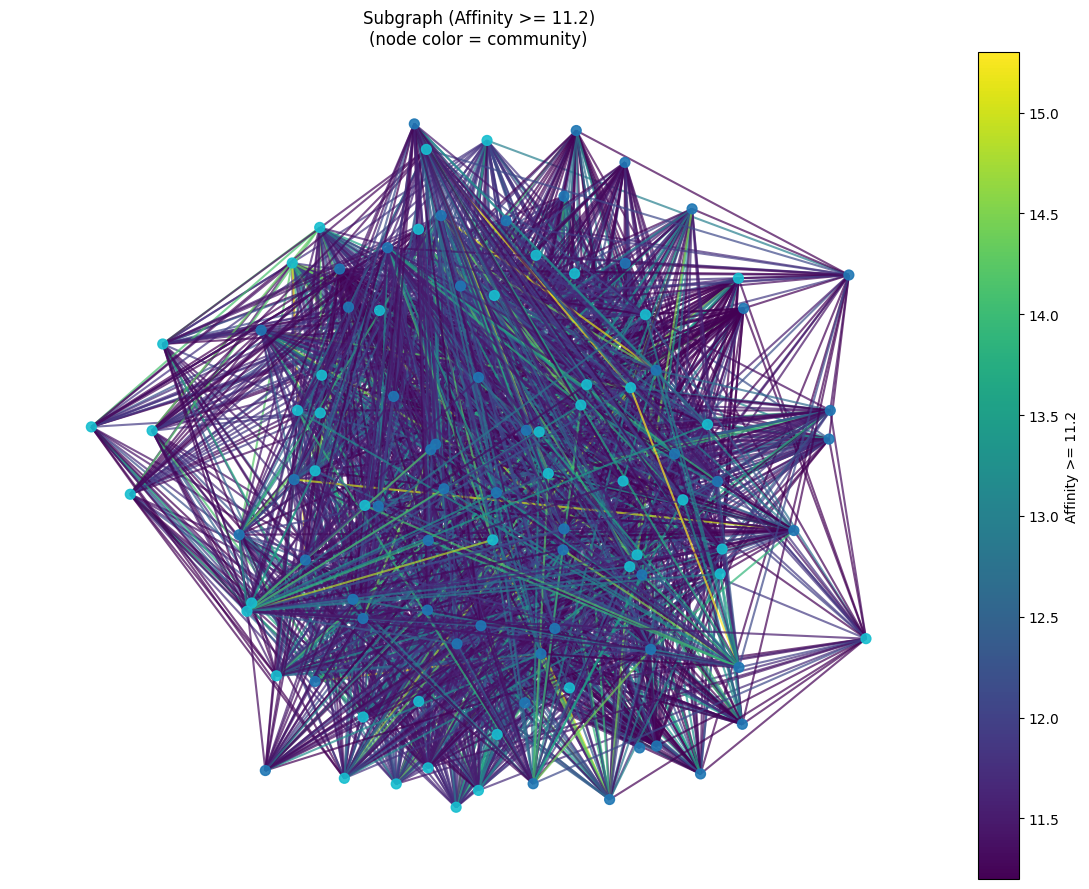

In [60]:
# --- 1) affinity 11.2 이상인 엣지만 추출 ---
threshold = 11.2
high_aff_edges = [
    (u, v, d) for u, v, d in subgraph.edges(data=True)
    if d.get("affinity", None) is not None and d["affinity"] >= threshold
]

# --- 2) 새로운 서브그래프 생성 ---
subgraph_high_aff = nx.Graph()
subgraph_high_aff.add_edges_from(high_aff_edges)

print(f"원래 서브그래프 엣지 수: {subgraph.number_of_edges()}")
print(f"필터링된 엣지 수(affinity >= {threshold}): {subgraph_high_aff.number_of_edges()}")

# --- 3) 필터링 후 커뮤니티 재검출 ---
communities_high_aff = list(nx.algorithms.community.greedy_modularity_communities(subgraph_high_aff))
node_to_community_high_aff = {}
for i, comm in enumerate(communities_high_aff):
    for node in comm:
        node_to_community_high_aff[node] = i

# --- 4) 시각화 ---
plt.figure(figsize=(11, 9))
pos = nx.spring_layout(subgraph_high_aff, seed=42)

node_colors = [node_to_community_high_aff[n] for n in subgraph_high_aff.nodes()]
nx.draw_networkx_nodes(
    subgraph_high_aff, pos,
    node_color=node_colors, cmap=plt.cm.tab10,
    node_size=50, alpha=0.9
)

edges = list(subgraph_high_aff.edges(data=True))
edge_affs = [d.get("affinity", None) for _, _, d in edges]
vmin, vmax = float(np.min(edge_affs)), float(np.max(edge_affs))

nx.draw_networkx_edges(
    subgraph_high_aff, pos,
    edge_color=edge_affs,
    edge_cmap=plt.cm.viridis,
    edge_vmin=vmin, edge_vmax=vmax,
    width=1.5, alpha=0.7
)

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm, fraction=0.046, pad=0.03)
cbar.set_label(f"Affinity >= {threshold}")

plt.title(f"Subgraph (Affinity >= {threshold})\n(node color = community)")
plt.axis("off")
plt.tight_layout()
plt.show()


In [61]:
community_size_df

,Community,Size
0,0,46
1,1,42
2,2,12


In [62]:
# 커뮤니티별 노드 분리
for i, comm in enumerate(communities_high_aff):
    drugs = [n for n in comm if n.startswith("CHEMBL")]
    targets = [n for n in comm if not n.startswith("CHEMBL")]
    print(f"\n=== Community {i} ===")
    print(f"- Drugs ({len(drugs)}): {drugs[:10]} ...")
    print(f"- Targets ({len(targets)}): {targets[:10]} ...")



=== Community 0 ===
- Drugs (0): [] ...
- Targets (54): ['COC(C(=O)N1Cc2[nH]nc(NC(=O)c3ccc(N4CCN(C)CC4)cc3)c2C1)c1ccccc1', 'Cc1cccc(NC(=O)Nc2ccc(-c3csc4c(-c5cnn(CC(C)O)c5)cnc(N)c34)cc2)c1', 'MLSNSQGQSPPVPFPAPAPPPQPPTPALPHPPAQPPPPPPQQFPQFHVKSGLQIKKNAIIDDYKVTSQVLGLGINGKVLQIFNKRTQEKFALKMLQDCPKARREVELHWRASQCPHIVRIVDVYENLYAGRKCLLIVMECLDGGELFSRIQDRGDQAFTEREASEIMKSIGEAIQYLHSINIAHRDVKPENLLYTSKRPNAILKLTDFGFAKETTSHNSLTTPCYTPYYVAPEVLGPEKYDKSCDMWSLGVIMYILLCGYPPFYSNHGLAISPGMKTRIRMGQYEFPNPEWSEVSEEVKMLIRNLLKTEPTQRMTITEFMNHPWIMQSTKVPQTPLHTSRVLKEDKERWEDVKEEMTSALATMRVDYEQIKIKKIEDASNPLLLKRRKKARALEAAALAH', 'CC(N)C1CCC(C(=O)Nc2ccncc2)CC1', 'MSRPPPTGKMPGAPETAPGDGAGASRQRKLEALIRDPRSPINVESLLDGLNSLVLDLDFPALRKNKNIDNFLNRYEKIVKKIRGLQMKAEDYDVVKVIGRGAFGEVQLVRHKASQKVYAMKLLSKFEMIKRSDSAFFWEERDIMAFANSPWVVQLFYAFQDDRYLYMVMEYMPGGDLVNLMSNYDVPEKWAKFYTAEVVLALDAIHSMGLIHRDVKPDNMLLDKHGHLKLADFGTCMKMDETGMVHCDTAVGTPDYISPEVLKSQGGDGFYGRECDWWSVGVFLYEMLVGDTPFYADSLVGTYSKIMDHKNSLCFPEDAEISKHAKNLICAFLTDREVRLGRNGVEEIRQHPFFKNDQWHWDNIRETAAPV

In [64]:
for i, comm in enumerate(communities_high_aff):
    sub = subgraph_high_aff.subgraph(comm)
    aff_vals = [d["affinity"] for _, _, d in sub.edges(data=True)]
    print(f"Community {i} | edges={len(aff_vals)} | mean affinity={np.mean(aff_vals):.2f}")


Community 0 | edges=712 | mean affinity=11.98
Community 1 | edges=520 | mean affinity=12.02


In [65]:
for i, comm in enumerate(communities_high_aff):
    sub = subgraph_high_aff.subgraph(comm)
    deg = dict(sub.degree())
    top_nodes = sorted(deg.items(), key=lambda x: x[1], reverse=True)[:5]
    print(f"Community {i} top hubs: {top_nodes}")


Community 0 top hubs: [('CC(=O)NCC(=O)N1C2CCC1c1cc(Nc3ncc(C(F)(F)F)c(NC4CCC4)n3)ccc12', 27), ('MSRPPPTGKMPGAPETAPGDGAGASRQRKLEALIRDPRSPINVESLLDGLNSLVLDLDFPALRKNKNIDNFLNRYEKIVKKIRGLQMKAEDYDVVKVIGRGAFGEVQLVRHKASQKVYAMKLLSKFEMIKRSDSAFFWEERDIMAFANSPWVVQLFYAFQDDRYLYMVMEYMPGGDLVNLMSNYDVPEKWAKFYTAEVVLALDAIHSMGLIHRDVKPDNMLLDKHGHLKLADFGTCMKMDETGMVHCDTAVGTPDYISPEVLKSQGGDGFYGRECDWWSVGVFLYEMLVGDTPFYADSLVGTYSKIMDHKNSLCFPEDAEISKHAKNLICAFLTDREVRLGRNGVEEIRQHPFFKNDQWHWDNIRETAAPVVPELSSDIDSSNFDDIEDDKGDVETFPIPKAFVGNQLPFIGFTYYRENLLLSDSPSCRETDSIQSRKNEESQEIQKKLYTLEEHLSNEMQAKEELEQKCKSVNTRLEKTAKELEEEITLRKSVESALRQLEREKALLQHKNAEYQRKADHEADKKRNLENDVNSLKDQLEDLKKRNQNSQISTEKVNQLQRQLDETNALLRTESDTAARLRKTQAESSKQIQQLESNNRDLQDKNCLLETAKLKLEKEFINLQSALESERRDRTHGSEIINDLQGRICGLEEDLKNGKILLAKVELEKRQLQERFTDLEKEKSNMEIDMTYQLKVIQQSLEQEEAEHKATKARLADKNKIYESIEEAKSEAMKEMEKKLLEERTLKQKVENLLLEAEKRCSLLDCDLKQSQQKINELLKQKDVLNEDVRNLTLKIEQETQKRCLTQNDLKMQTQQVNTLKMSEKQLKQENNHLMEMKMNLEKQNAELRKERQDADGQMKELQDQLEAEQYFSTLYKTQVRELKEECEEKTKLGKELQQKKQELQ

### 속성에 따른 분석

### 약물 속성 기반으로 한 affinity와의 상관관계 분석

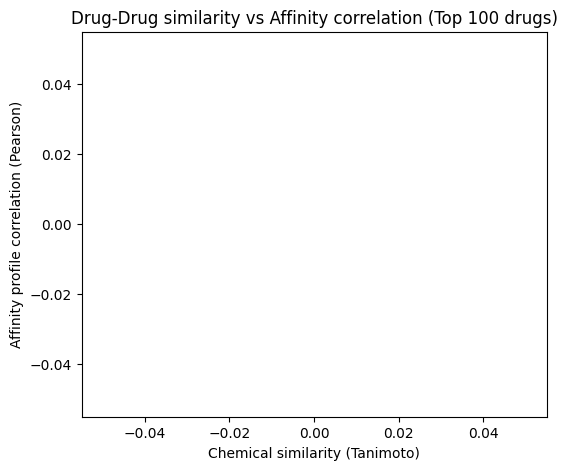

In [63]:
# 약물 등장 빈도 기준 상위 100개 선택
top_drugs = kiba["Drug_ID"].value_counts().head(100).index
kiba_sub = kiba[kiba["Drug_ID"].isin(top_drugs)]

# 약물별 SMILES
drug_smiles = kiba_sub.groupby("Drug_ID")["Drug"].first().to_dict()

# 약물별 affinity profile
drug_profiles = kiba_sub.pivot_table(index="Drug_ID", columns="Drug", values="Y")

# RDKit fingerprint 생성
def smiles_to_fp(smiles, radius=2, nbits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=nbits)
    else:
        return None

drug_fps = {d: smiles_to_fp(s) for d, s in drug_smiles.items() if smiles_to_fp(s) is not None}

# 유사도 및 상관계수 계산
similarities, correlations = [], []

drugs = list(drug_fps.keys())
for i in range(len(drugs)):
    for j in range(i+1, len(drugs)):
        d1, d2 = drugs[i], drugs[j]
        
        # 화학적 유사도 (Tanimoto)
        sim = DataStructs.TanimotoSimilarity(drug_fps[d1], drug_fps[d2])
        
        # 공통 target에 대한 affinity profile 상관계수
        prof1, prof2 = drug_profiles.loc[d1], drug_profiles.loc[d2]
        common = prof1.dropna().index.intersection(prof2.dropna().index)
        
        if len(common) > 2:  # 공통 target 최소 3개 이상
            corr, _ = pearsonr(prof1[common], prof2[common])
            similarities.append(sim)
            correlations.append(corr)

# 산점도 시각화
plt.figure(figsize=(6,5))
plt.scatter(similarities, correlations, alpha=0.4)
plt.xlabel("Chemical similarity (Tanimoto)")
plt.ylabel("Affinity profile correlation (Pearson)")
plt.title("Drug-Drug similarity vs Affinity correlation (Top 100 drugs)")
plt.show()
